# TP 1 : Unsupervised learning

Importing the python libraries for lab :
- Numppy for working with our array
- pylab or matplotlib for plotting our data
- scipy to do more advances operations on our array

In [110]:
import numpy as np
import pylab as pl
import scipy as sp

## 1.3.1 Loading the data for both DataSets :

- digits.tmz
- temper.npz

- The three matrices of the temper dataset : data, villes and varname are stored in x1
- The two matrices of the digits dataset : x and xt are stored in x2
- The two matrices of the digits dataset : y and yt are stored in y2

For the x2 matrices we do a simple pre-processing that will scale the values between 0 and 1 by dividing by 255 (range of pixels values) to have a better computation afterwards because computers work better with scaled values espacially between 0 and 1.

In [111]:
x1 = np.load('temper.npz')

data_digits = np.load('digits.npz')
x2 = data_digits['x'] / 255.0
y2 = data_digits['y']

x2 = np.concatenate((x2, data_digits['xt'] / 255.0))
y2 = np.concatenate((y2, data_digits['yt']))

## 1.3.2 Quick look at the data

Here, we only have to compute the twelwe first columns of our matrix data where are stored the tempature data for each month.
We plug also the name of months with the matrix varname and plot this using.
The histogram method called bar allow us to vizualise quickly what the data looks like.
Therefore we can instantly see the logic behind the data where the summer have much higher tempeature means than the winter.

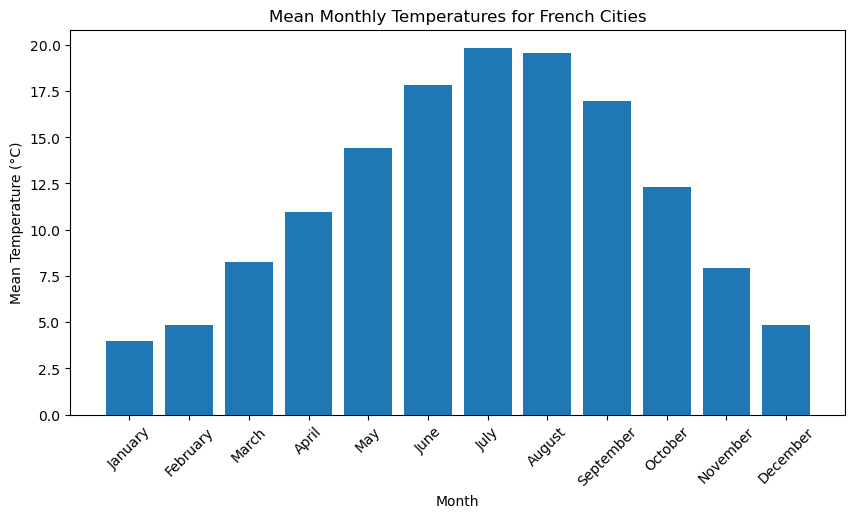

In [112]:
mean_temperatures = np.mean(x1['data'][:, :12], axis=0)
months = x1['varname'][:12]

pl.figure(figsize=(10, 5))
pl.bar(months, mean_temperatures)
pl.title('Mean Monthly Temperatures for French Cities')
pl.xlabel('Month')
pl.ylabel('Mean Temperature (°C)')
pl.xticks(rotation=45)
pl.show()

For plotting the images of our digits dataset, we have to use another method wich is 'pl.imshow'
First, we reshape the images, then we create a grid where we will output the images with a loop.
We match the images in the x2 matrix with y2 corresponding labels.

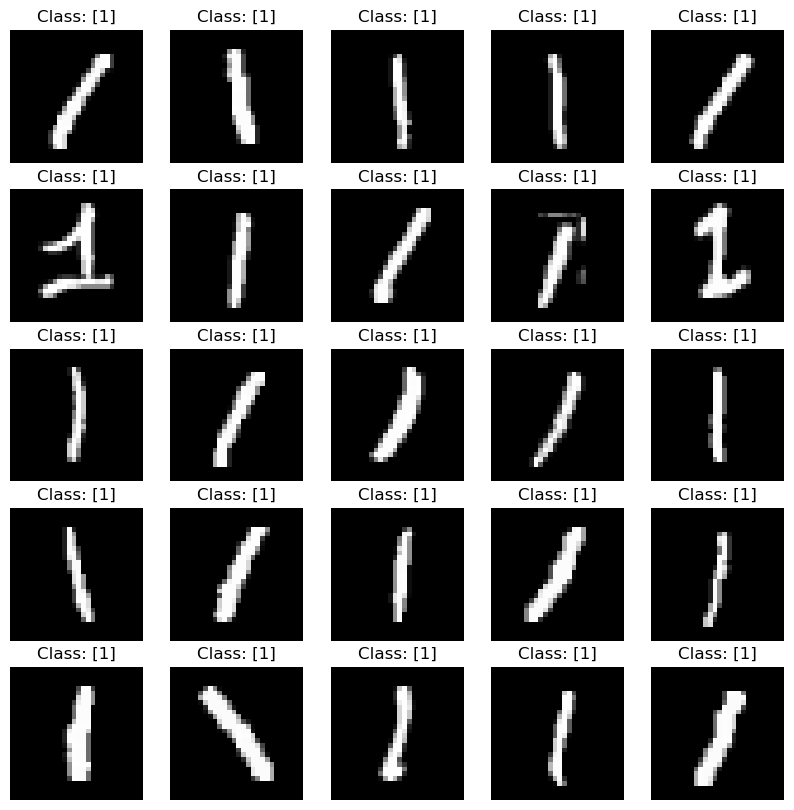

In [113]:
# Reshape the data into 28x28 images
x2_images = x2.reshape(-1, 28, 28)

# Create a grid of image subplots
pl.figure(figsize=(10, 10))
for i in range(25):
    pl.subplot(5, 5, i + 1)
    pl.imshow(x2_images[i], cmap='gray')
    pl.title(f"Class: {y2[i]}")
    pl.axis('off')

pl.show()

## 1.3.3 (Bonus) Reproducing the figures of the TP

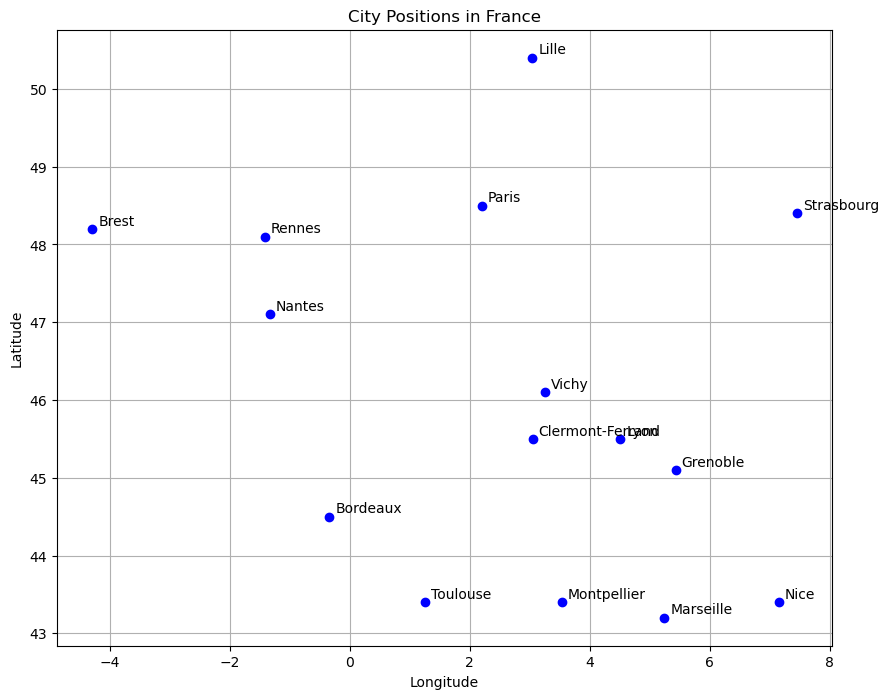

In [114]:
villes = x1['villes']  # List of city names
latitudes_longitudes = x1['data'][:, -2:]  # Latitude and longitude data

# Create a scatter plot of city positions with lighter blue points
pl.figure(figsize=(10, 8))
pl.scatter(latitudes_longitudes[:, 1], latitudes_longitudes[:, 0], marker='o', color='blue')

# Add city names close to the points with smaller font size
for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1] + 0.1, latitudes_longitudes[i, 0] + 0.05), fontsize=10)

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('City Positions in France')
pl.grid(True)
pl.show()

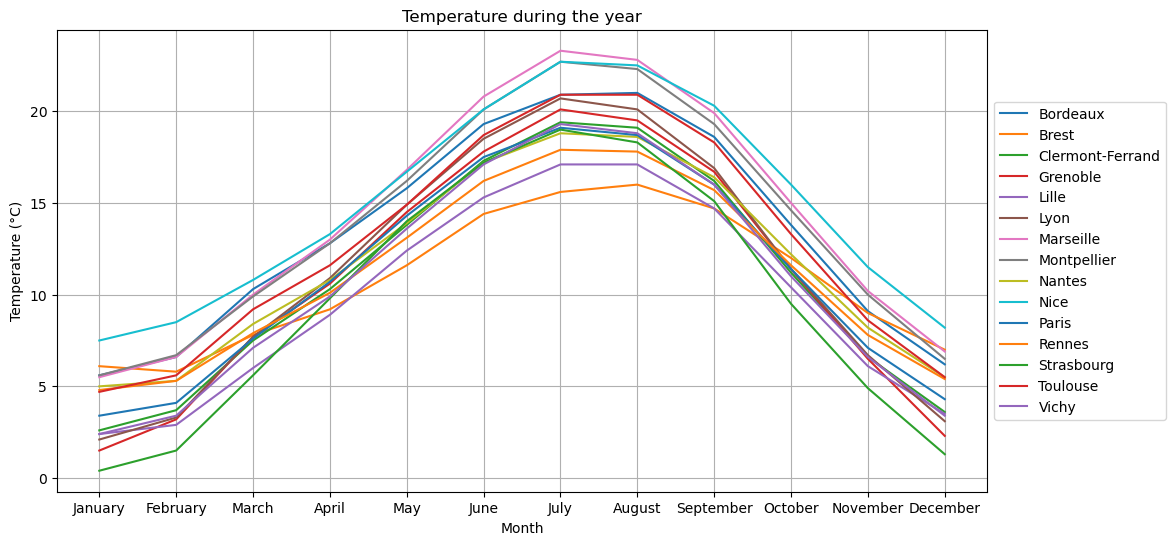

In [115]:
# Créer un graphique avec des courbes pour chaque ville
pl.figure(figsize=(12, 6))
data_temperatures = x1['data'][:, :12]


for i, ville in enumerate(villes):
    pl.plot(months,data_temperatures[i], label=ville)

pl.xlabel('Month')
pl.ylabel('Temperature (°C)')
pl.title('Temperature during the year')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.grid(True)
pl.show()

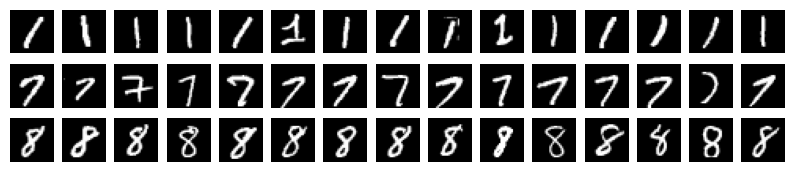

In [116]:
# Sélectionner les indices des 15 premières images de chaque classe (1, 7 et 8)
class_1_indices = np.where(y2 == 1)[0][:15]
class_7_indices = np.where(y2 == 7)[0][:15]
class_8_indices = np.where(y2 == 8)[0][:15]

# Créer une figure avec trois rangées (une pour chaque classe)
pl.figure(figsize=(10, 2))

# Afficher les 15 premières images de la classe 1
for i, idx in enumerate(class_1_indices):
    pl.subplot(3, 15, i + 1)
    pl.imshow(x2[idx].reshape(28, 28), cmap='gray')
    pl.axis('off')

# Afficher les 15 premières images de la classe 7
for i, idx in enumerate(class_7_indices):
    pl.subplot(3, 15, 15 + i + 1)
    pl.imshow(x2[idx].reshape(28, 28), cmap='gray')
    pl.axis('off')

# Afficher les 15 premières images de la classe 8
for i, idx in enumerate(class_8_indices):
    pl.subplot(3, 15, 30 + i + 1)
    pl.imshow(x2[idx].reshape(28, 28), cmap='gray')
    pl.axis('off')

pl.show()

## Clustering

For clustering we will use the sklearn libraries for ML.

First, we'll look at the temper dataset and then the digits one.

## 2.1.1 Perform K-Means for K=3

After fitting all of our samples in the model, we can get the values of our clusters centroids and estimated classes with sklearn's "_" parameters.

Temper
Cluster Centroids temper:
[[ 5.78        6.8        10.04       12.7        16.08       19.8
  22.1        21.9        19.28       14.54        9.88        6.66
  43.58        3.368     ]
 [ 2.11428571  3.15714286  7.02857143 10.15714286 13.92857143 17.24285714
  19.24285714 18.8        15.94285714 10.9         6.35714286  3.07142857
  47.07142857  4.13428571]
 [ 5.3         5.46666667  8.03333333 10.03333333 12.86666667 15.93333333
  17.43333333 17.46666667 15.6        11.93333333  8.33333333  5.96666667
  47.8        -2.34333333]]

Estimated Classes for All Samples temper:
[0 2 1 1 1 1 0 0 2 0 1 2 1 0 1]


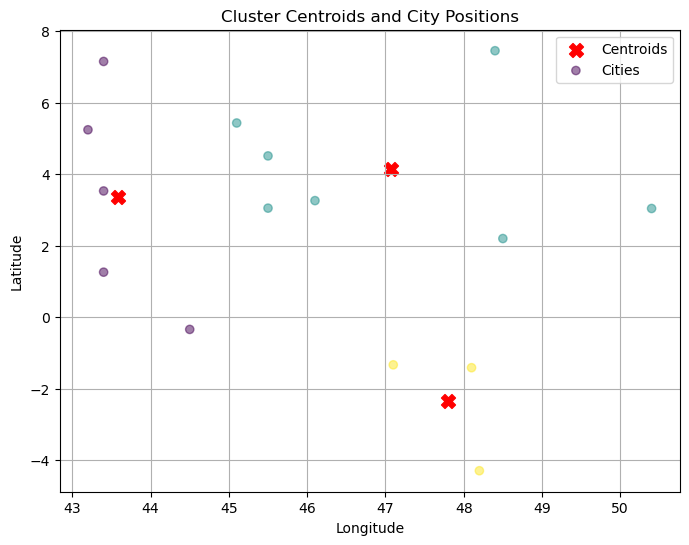

In [117]:

from sklearn.cluster import KMeans

# K-means clustering with K=3
kmeans_temper = KMeans(n_clusters=3, random_state=0)
kmeans_temper.fit(x1['data'])

# Get cluster centroids and estimated classes
cluster_centroids_temper = kmeans_temper.cluster_centers_
estimated_classes_temper = kmeans_temper.labels_

# Access to the cluster centroids and estimated classes :
print("Temper")
print("Cluster Centroids temper:")
print(cluster_centroids_temper)
print("\nEstimated Classes for All Samples temper:")
print(estimated_classes_temper)

# 2.1.2 Plot the cluster centroids
pl.figure(figsize=(8, 6))
pl.scatter(cluster_centroids_temper[:, -2], cluster_centroids_temper[:, -1], marker='X', s=100, c='red', label='Centroids')
pl.scatter(x1['data'][:, -2], x1['data'][:, -1], c=kmeans_temper.labels_, cmap='viridis', alpha=0.5, label='Cities')
pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title('Cluster Centroids and City Positions')

for i, ville in enumerate(villes):
    pl.annotate(ville, (latitudes_longitudes[i, 1], latitudes_longitudes[i, 0]), fontsize=10)

pl.legend()
pl.grid(True)
pl.show()

Digits
Cluster Centroids digits:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Estimated Classes for All Samples digits:
[2 2 2 ... 2 0 0]


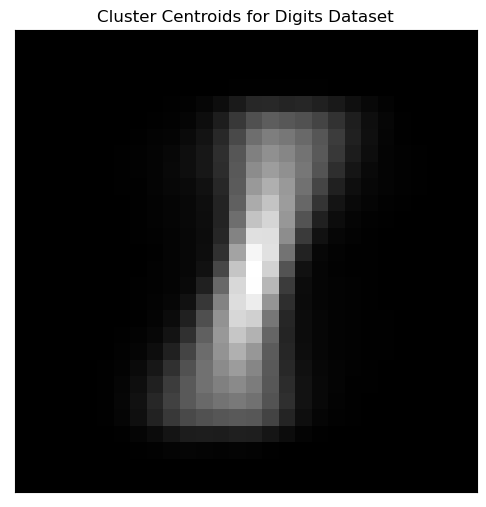

In [118]:

# K-means clustering with K=3

kmeans_digits = KMeans(n_clusters=3, random_state=0)
kmeans_digits.fit(x2)

# Get cluster centroids and estimated classes

cluster_centroids_digits = kmeans_digits.cluster_centers_
estimated_classes_digits = kmeans_digits.labels_

# Access to the cluster centroids and estimated classes :

print("Digits")
print("Cluster Centroids digits:")
print(cluster_centroids_digits)
print("\nEstimated Classes for All Samples digits:")
print(estimated_classes_digits)

pl.figure(figsize=(8, 6))
for centroid in cluster_centroids_digits:
    pl.imshow(centroid.reshape(28, 28), cmap='gray', interpolation='nearest')
    pl.xticks(())
    pl.yticks(())
pl.title('Cluster Centroids for Digits Dataset')
pl.show()


## 2.1.2

Temper :

We can see that the samples are relatively well clustered even though our centroids for the clusters are not close to the data. That is the problem with this classic version of K-Means.
We obviously see that geographical clusters work well with the clustering and show explictely a link between the geographical emplacement and the temperature of the city. K-Means is adapted to this dataset.


Digits :

The interpretation of the centroids in the digits dataset is less straightforward compared to the geographical interpretation of the temperature data. Since K-means is an unsupervised method, the clusters are formed based on pixel similarities, and it may not have a direct connection to digit class labels. Nonetheless, you can observe how the algorithm groups similar digit patterns.

## 2.1.3

Temper :

I believe good values in this case good values are 3, 4 or 5. Indeed, with smallers values it's really hard to interpret the results with precision regarding the reality that we want to observe. The goal should be to have a vision of different temparature behaviour within the regions in France. Therefore, 2 regions is not enough but if we have more than 5 clusters, we obtain clusters with only 1 city which is not ideal, we lose the sense of clusters.
With 3,4 or 5 clusters, the results seem great.

Digits :

With the value 1, the image seem to be the visual mean of the three classes. with the 3, the image does not correspond to any number and for the other values, it corresponds to one of the classes each time.
Therefore, I think the best values in this case are 1 and 3.





## 2.2.1 Temperature Dataset

